# What is the employee satisfaction rate? & what variables contribute to said satisfaction?

In [ ]:
# download/upload possible needed packages to analyze the data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#get_ipython().run_line_magic('matplotlib', 'inline')
#from sklearn import metrics
#from sklearn.model_selection import KFold
#from sklearn.model_selection import cross_val_score

In [6]:
# Import the dataset

In [94]:
EmployeeSatisfaction = pd.read_csv("../Data/Employee-Satisfaction-Index.csv")

In [95]:
EmployeeSatisfaction

,Unnamed: 0,emp_id,age,Dept,location,education,recruitment_type,job_level,rating,onsite,awards,certifications,salary,satisfied
0,0,HR8270,28,HR,Suburb,PG,Referral,5,2,0,1,0,86750,1
1,1,TECH1860,50,Technology,Suburb,PG,Walk-in,3,5,1,2,1,42419,0
2,2,TECH6390,43,Technology,Suburb,UG,Referral,4,1,0,2,0,65715,0
3,3,SAL6191,44,Sales,City,PG,On-Campus,2,3,1,0,0,29805,1
4,4,HR6734,33,HR,City,UG,Recruitment Agency,2,1,0,5,0,29805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,HR5330,49,HR,Suburb,PG,On-Campus,2,5,0,6,0,29805,1
496,496,TECH9010,24,Technology,Suburb,UG,Referral,2,4,0,2,0,29805,0
497,497,MKT7801,34,Marketing,City,PG,On-Campus,1,3,0,2,0,24076,1
498,498,TECH5846,26,Technology,City,UG,On-Campus,2,1,1,1,1,29805,0


In [9]:
# Begin data wrangling

In [10]:
# Remove unneccessary variables/columns

In [96]:
EmployeeSatisfaction.drop(["emp_id", "education", "recruitment_type", "awards", "certifications"], axis=1, inplace=True)

In [97]:
EmployeeSatisfaction

,Unnamed: 0,age,Dept,location,job_level,rating,onsite,salary,satisfied
0,0,28,HR,Suburb,5,2,0,86750,1
1,1,50,Technology,Suburb,3,5,1,42419,0
2,2,43,Technology,Suburb,4,1,0,65715,0
3,3,44,Sales,City,2,3,1,29805,1
4,4,33,HR,City,2,1,0,29805,1
...,...,...,...,...,...,...,...,...,...
495,495,49,HR,Suburb,2,5,0,29805,1
496,496,24,Technology,Suburb,2,4,0,29805,0
497,497,34,Marketing,City,1,3,0,24076,1
498,498,26,Technology,City,2,1,1,29805,0


In [98]:
ES = EmployeeSatisfaction.iloc[:,1:]

In [99]:
ES.to_csv("../Data/ES.csv",index=False)

In [100]:
ES

,age,Dept,location,job_level,rating,onsite,salary,satisfied
0,28,HR,Suburb,5,2,0,86750,1
1,50,Technology,Suburb,3,5,1,42419,0
2,43,Technology,Suburb,4,1,0,65715,0
3,44,Sales,City,2,3,1,29805,1
4,33,HR,City,2,1,0,29805,1
...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,2,5,0,29805,1
496,24,Technology,Suburb,2,4,0,29805,0
497,34,Marketing,City,1,3,0,24076,1
498,26,Technology,City,2,1,1,29805,0


In [15]:
# Recode both the Dept & location varible columns

In [101]:
ES['Dept'].value_counts()

Purchasing    109
HR            106
Technology     98
Marketing      95
Sales          92
Name: Dept, dtype: int64

In [102]:
ES['Dept'].unique()

array(['HR', 'Technology', 'Sales', 'Purchasing', 'Marketing'],
      dtype=object)

In [48]:
def recode_Dept(series):
    if series == 'HR':
        return 0
    elif series == 'Technology':
        return 1
    elif series == 'Sales':
        return 2
    elif series == 'Purchasing':
        return 3
    elif series == 'Marketing':
        return 4

In [103]:
ES['DeptR'] = ES['Dept'].apply(recode_Dept)

In [104]:
ES[['Dept', 'DeptR']]

,Dept,DeptR
0,HR,0
1,Technology,1
2,Technology,1
3,Sales,2
4,HR,0
...,...,...
495,HR,0
496,Technology,1
497,Marketing,4
498,Technology,1


In [105]:
ES['location'].describe()

count      500
unique       2
top       City
freq       259
Name: location, dtype: object

In [106]:
ES['location'].unique()

array(['Suburb', 'City'], dtype=object)

In [53]:
def recode_location(series):
    if series == 'Suburb':
        return 0
    elif series == 'City':
        return 1

In [107]:
ES['locationR'] = ES['location'].apply(recode_location)

In [108]:
ES[['location', 'locationR']]

,location,locationR
0,Suburb,0
1,Suburb,0
2,Suburb,0
3,City,1
4,City,1
...,...,...
495,Suburb,0
496,Suburb,0
497,City,1
498,City,1


In [109]:
ES

,age,Dept,location,job_level,rating,onsite,salary,satisfied,DeptR,locationR
0,28,HR,Suburb,5,2,0,86750,1,0,0
1,50,Technology,Suburb,3,5,1,42419,0,1,0
2,43,Technology,Suburb,4,1,0,65715,0,1,0
3,44,Sales,City,2,3,1,29805,1,2,1
4,33,HR,City,2,1,0,29805,1,0,1
...,...,...,...,...,...,...,...,...,...,...
495,49,HR,Suburb,2,5,0,29805,1,0,0
496,24,Technology,Suburb,2,4,0,29805,0,1,0
497,34,Marketing,City,1,3,0,24076,1,4,1
498,26,Technology,City,2,1,1,29805,0,1,1


In [110]:
ES.drop(["Dept", "location"], axis=1, inplace=True)

In [111]:
ES

,age,job_level,rating,onsite,salary,satisfied,DeptR,locationR
0,28,5,2,0,86750,1,0,0
1,50,3,5,1,42419,0,1,0
2,43,4,1,0,65715,0,1,0
3,44,2,3,1,29805,1,2,1
4,33,2,1,0,29805,1,0,1
...,...,...,...,...,...,...,...,...
495,49,2,5,0,29805,1,0,0
496,24,2,4,0,29805,0,1,0
497,34,1,3,0,24076,1,4,1
498,26,2,1,1,29805,0,1,1


In [129]:
ES.to_csv("../Data/ESmc.csv",index=True) 

In [112]:
ES = ES.copy()
ES['satisfied'] = ES['satisfied'].astype(bool)
print(ES)

     age  job_level  rating  onsite  salary  satisfied  DeptR  locationR
0     28          5       2       0   86750       True      0          0
1     50          3       5       1   42419      False      1          0
2     43          4       1       0   65715      False      1          0
3     44          2       3       1   29805       True      2          1
4     33          2       1       0   29805       True      0          1
..   ...        ...     ...     ...     ...        ...    ...        ...
495   49          2       5       0   29805       True      0          0
496   24          2       4       0   29805      False      1          0
497   34          1       3       0   24076       True      4          1
498   26          2       1       1   29805      False      1          1
499   26          3       4       0   42419      False      1          1

[500 rows x 8 columns]


In [113]:
ES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        500 non-null    int64
 1   job_level  500 non-null    int64
 2   rating     500 non-null    int64
 3   onsite     500 non-null    int64
 4   salary     500 non-null    int64
 5   satisfied  500 non-null    bool 
 6   DeptR      500 non-null    int64
 7   locationR  500 non-null    int64
dtypes: bool(1), int64(7)
memory usage: 28.0 KB


In [84]:
# Now it's time to start analyzing this cleaned up data!

In [114]:
# More packages needed for the needed which I added at the top where I uploaded other packages

In [115]:
# Testing for Linearity & Normality

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


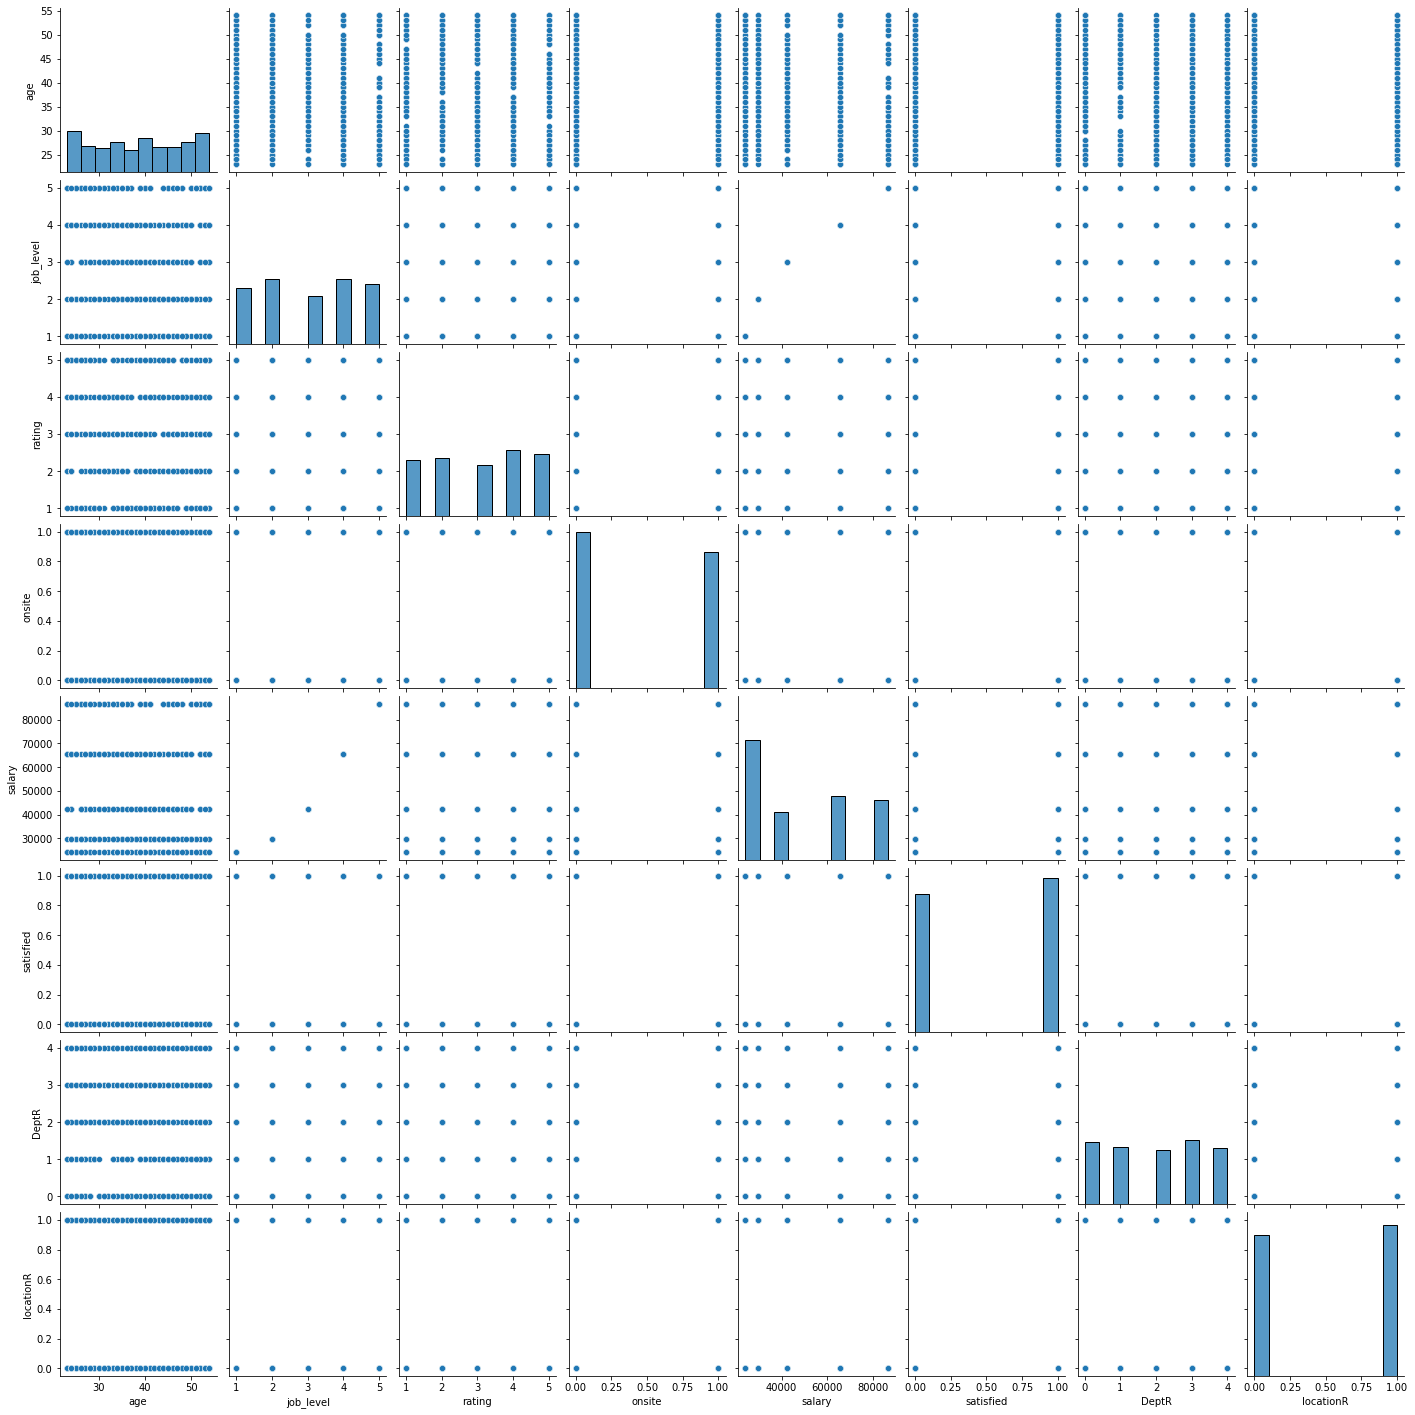

In [116]:
sns.pairplot(ES)

In [117]:
# Lets test between job_level & satisfied to see the effects

/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T/ipykernel_18059/2616332618.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ES['job_level'])


<AxesSubplot: xlabel='job_level', ylabel='Density'>

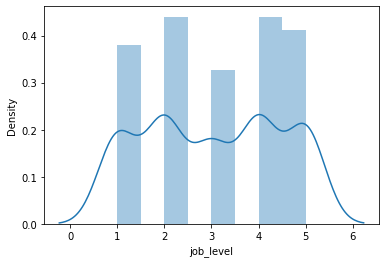

In [118]:
sns.distplot(ES['job_level'])

/var/folders/j0/q3s7blms6hx_6_wyd2082mlh0000gn/T/ipykernel_18059/2885573290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ES['satisfied'])


<AxesSubplot: xlabel='satisfied', ylabel='Density'>

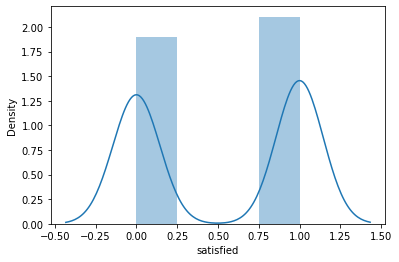

In [119]:
sns.distplot(ES['satisfied'])

In [120]:
# Testing for Homoscedascity

In [121]:
x = ES['job_level']
y = ES['satisfied']

In [122]:
model = sm.OLS(y,x).fit()

In [123]:
pred_val = model.fittedvalues.copy()
true_val = ES['satisfied'].values.copy()
residual = true_val - pred_val

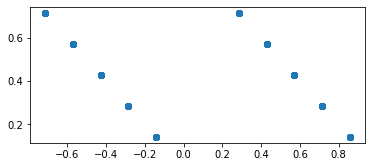

In [124]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [125]:
# Hmmm, interesting pattern. Lets check some stats

In [126]:
sms.diagnostic.het_breuschpagan(residual, ES[['job_level']])

(224.59194429134683, nan, 406.9284753236826, 1.278082656236448e-66)

In [127]:
# With the F (nan) value being high & the p-value being less than .05 there IS significance between job_level & employee satisfaction! Which makes this assumption heteroscedastic